In [9]:
#项目2-项目实施代码

#导入pandas与numpy库
import pandas as pd
import numpy as np

#读取数据并将数据集进行分离，拆分为特征变量（data）与标签（target）
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]

#将特征变量（data）与标签（target）分别赋值给x和y
x,y=data,target

In [10]:
#使用3种回归方法训练模型
#导入3种模型及划分样本函数
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt

#分割训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3) 

#定义各种线性回归对象
lr= LinearRegression()
rd=Ridge()
ls=Lasso()
models=[lr,rd,ls]
names=['Linear','Ridge','Lasso']

#分别训练模型并进行回归，计算准确率
for model,name in zip(models,names):
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print("%s模型的预测准确率为：%.5f"%(name,score))
    

Linear模型的预测准确率为：0.78363
Ridge模型的预测准确率为：0.78905
Lasso模型的预测准确率为：0.66948


Linear模型的最大预测准确率为：0.78363
Ridge模型的最大预测准确率为：0.78905
Lasso模型的最大预测准确率为：0.78573


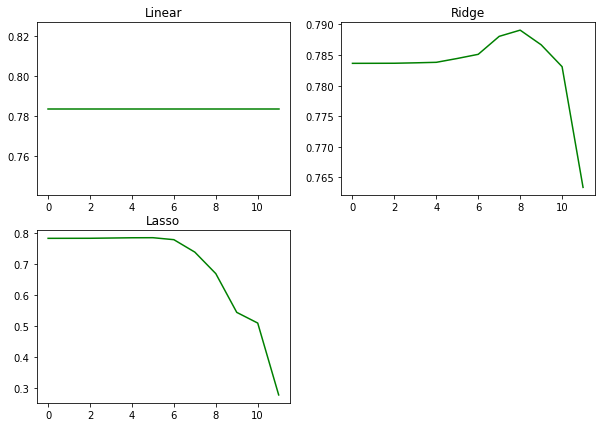

In [11]:
#测试alpha在不同取值下的回归效果
scores=[]
alphas=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]
for index,model in enumerate(models):
    scores.append([])
    for alpha in alphas:
        if index>0:
            model.alpha=alpha
        model.fit(x_train,y_train)
        scores[index].append(model.score(x_test,y_test))
        
#绘制结果图
fig=plt.figure(figsize=(10,7))
for i,name in enumerate(names):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(alphas)),scores[i],'g-')
    plt.title(name)
    print('%s模型的最大预测准确率为：%.5f'%(name,max(scores[i])))
plt.show()